In [99]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [7]:
# Importing the warnings

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Loading the dataset

from google.colab import files
uploader = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [20]:
# Accessing the dataset

data = pd.read_csv('ToyotaCorolla.csv', encoding='unicode_escape')

In [21]:
# Checking the head of data

data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [23]:
data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [28]:
data = data.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [29]:
# Checking the head of data
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [38]:
# Renaming the col name
data = data.rename(columns = {'Age_08_04': 'Age'})

In [39]:
# 1st Business Moment : Measures of Central Tendency
# Checking the Mean, Median, Mode

data.mean()

Price            10730.824513
Age                 55.947075
KM               68533.259749
HP                 101.502089
cc                1576.855850
Doors                4.033426
Gears                5.026462
Quarterly_Tax       87.122563
Weight            1072.459610
dtype: float64

In [40]:
data.median()

Price             9900.0
Age                 61.0
KM               63389.5
HP                 110.0
cc                1600.0
Doors                4.0
Gears                5.0
Quarterly_Tax       85.0
Weight            1070.0
dtype: float64

In [41]:
data.mode()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,8950,68,36000,110,1600,5,5,85,1075


In [42]:
# 2nd Business Moment : MEasures of Dispersion
# Checking the Variance, Standard Deviation

data.var()


Price            1.315487e+07
Age              3.459596e+02
KM               1.406734e+09
HP               2.244327e+02
cc               1.801041e+05
Doors            9.075927e-01
Gears            3.553619e-02
Quarterly_Tax    1.691563e+03
Weight           2.771088e+03
dtype: float64

In [43]:
data.std()

Price             3626.964585
Age                 18.599988
KM               37506.448872
HP                  14.981080
cc                 424.386770
Doors                0.952677
Gears                0.188510
Quarterly_Tax       41.128611
Weight              52.641120
dtype: float64

In [44]:
# 3rd Business Moment : Measures of Skewness

data.skew()

Price             1.703885
Age              -0.826702
KM                1.015912
HP                0.955836
cc               27.431793
Doors            -0.076395
Gears             2.283960
Quarterly_Tax     1.993834
Weight            3.108639
dtype: float64

In [45]:
# 4th Business Moment : Measures of kurtisos

data.kurt()

Price              3.737781
Age               -0.076632
KM                 1.685057
HP                 8.836434
cc               930.711227
Doors             -1.874765
Gears             37.703476
Quarterly_Tax      4.298345
Weight            19.362901
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4987df2290>,
 'caps': [<matplotlib.lines.Line2D at 0x7f49879d3090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4987a39fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f49879d3b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4987a395d0>],
 'means': []}

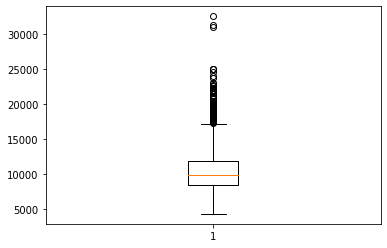

In [46]:
# Graphical Representation

plt.boxplot(data['Price'])

In [49]:
# Cleaning the Outliers with Winsorizer

from feature_engine.outliers import Winsorizer

In [48]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 7.0 MB/s 


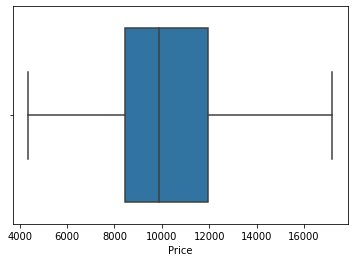

In [50]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                            tail = 'both',
                             fold = 1.5,
                              variables = ('Price'))

data_iqr = winsor_iqr.fit_transform(data[['Price']])

sns.boxplot(data_iqr['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f498651ba90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f498647a390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f498644ef10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f49864120d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4986412610>],
 'means': []}

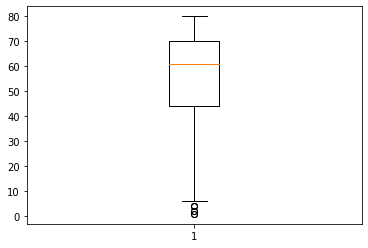

In [51]:
plt.boxplot(data['Age'])

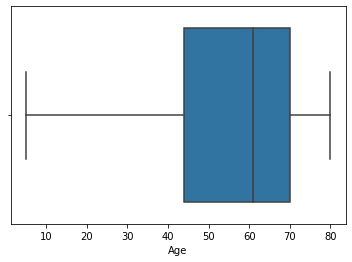

In [52]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                            tail = 'both',
                             fold = 1.5,
                              variables = ('Age'))

data_iqr = winsor_iqr.fit_transform(data[['Age']])

sns.boxplot(data_iqr['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f498635c6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f498635c5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4986352450>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4986349050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4986375250>],
 'means': []}

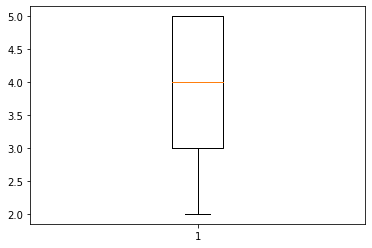

In [53]:
plt.boxplot(data['Doors'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f498636f190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4986340c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f498636f090>],
 'medians': [<matplotlib.lines.Line2D at 0x7f49863406d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f49862fae10>],
 'means': []}

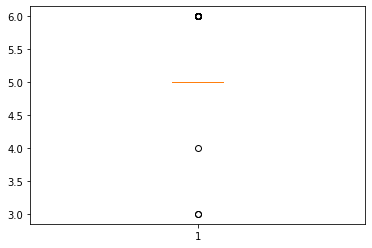

In [54]:
plt.boxplot(data['Gears'])

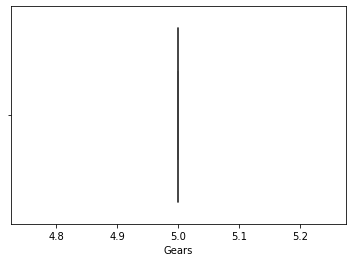

In [55]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                            tail = 'both',
                             fold = 1.5,
                              variables = ('Gears'))

data_iqr = winsor_iqr.fit_transform(data[['Gears']])

sns.boxplot(data_iqr['Gears'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f49862c23d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f498621fe50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4986328ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f498621f650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4986227f90>],
 'means': []}

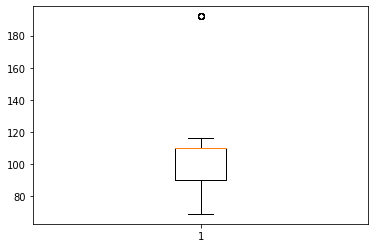

In [56]:
plt.boxplot(data['HP'])

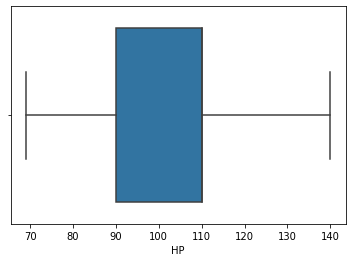

In [58]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                            tail = 'both',
                             fold = 1.5,
                              variables = ('HP'))

data_iqr = winsor_iqr.fit_transform(data[['HP']])

sns.boxplot(data_iqr['HP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4986113f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f498611a710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4986113250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f498611a2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f49860c2510>],
 'means': []}

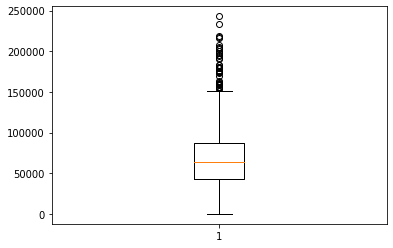

In [59]:
plt.boxplot(data['KM'])

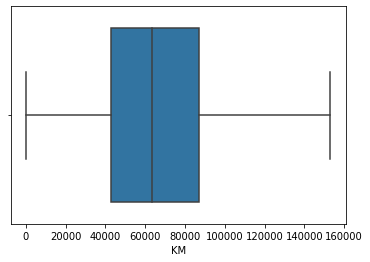

In [60]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                            tail = 'both',
                             fold = 1.5,
                              variables = ('KM'))

data_iqr = winsor_iqr.fit_transform(data[['KM']])

sns.boxplot(data_iqr['KM'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f49860f2b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f49860fbcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f498616d790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f49861b5bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f49862900d0>],
 'means': []}

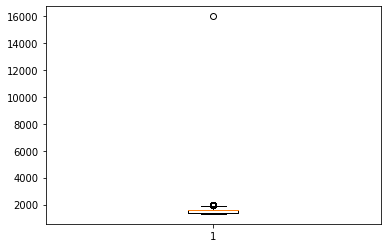

In [62]:
plt.boxplot(data['cc'])

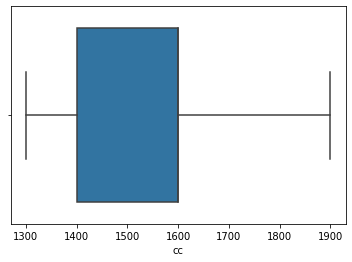

In [63]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                            tail = 'both',
                             fold = 1.5,
                              variables = ('cc'))

data_iqr = winsor_iqr.fit_transform(data[['cc']])

sns.boxplot(data_iqr['cc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4985fe8a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4985fe3790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4985fe8890>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4985fe3490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4985ff62d0>],
 'means': []}

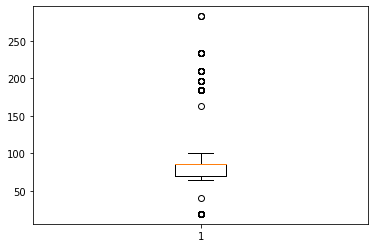

In [64]:
plt.boxplot(data['Quarterly_Tax'])

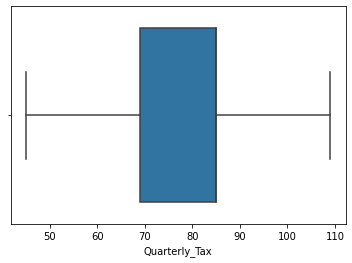

In [65]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                            tail = 'both',
                             fold = 1.5,
                              variables = ('Quarterly_Tax'))

data_iqr = winsor_iqr.fit_transform(data[['Quarterly_Tax']])

sns.boxplot(data_iqr['Quarterly_Tax'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4985ee5e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4985eea390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4985ee5bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4985e95090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4985e955d0>],
 'means': []}

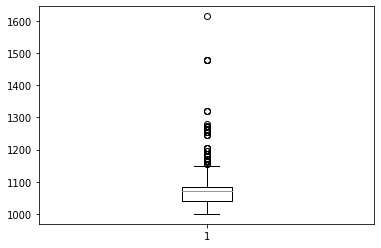

In [66]:
plt.boxplot(data['Weight'])

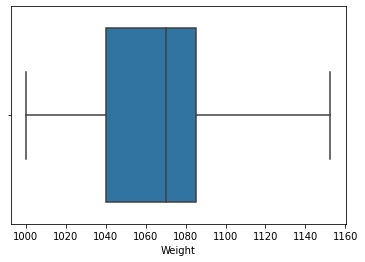

In [67]:
winsor_iqr = Winsorizer(capping_method = 'iqr',
                            tail = 'both',
                             fold = 1.5,
                              variables = ('Weight'))

data_iqr = winsor_iqr.fit_transform(data[['Weight']])

sns.boxplot(data_iqr['Weight'])

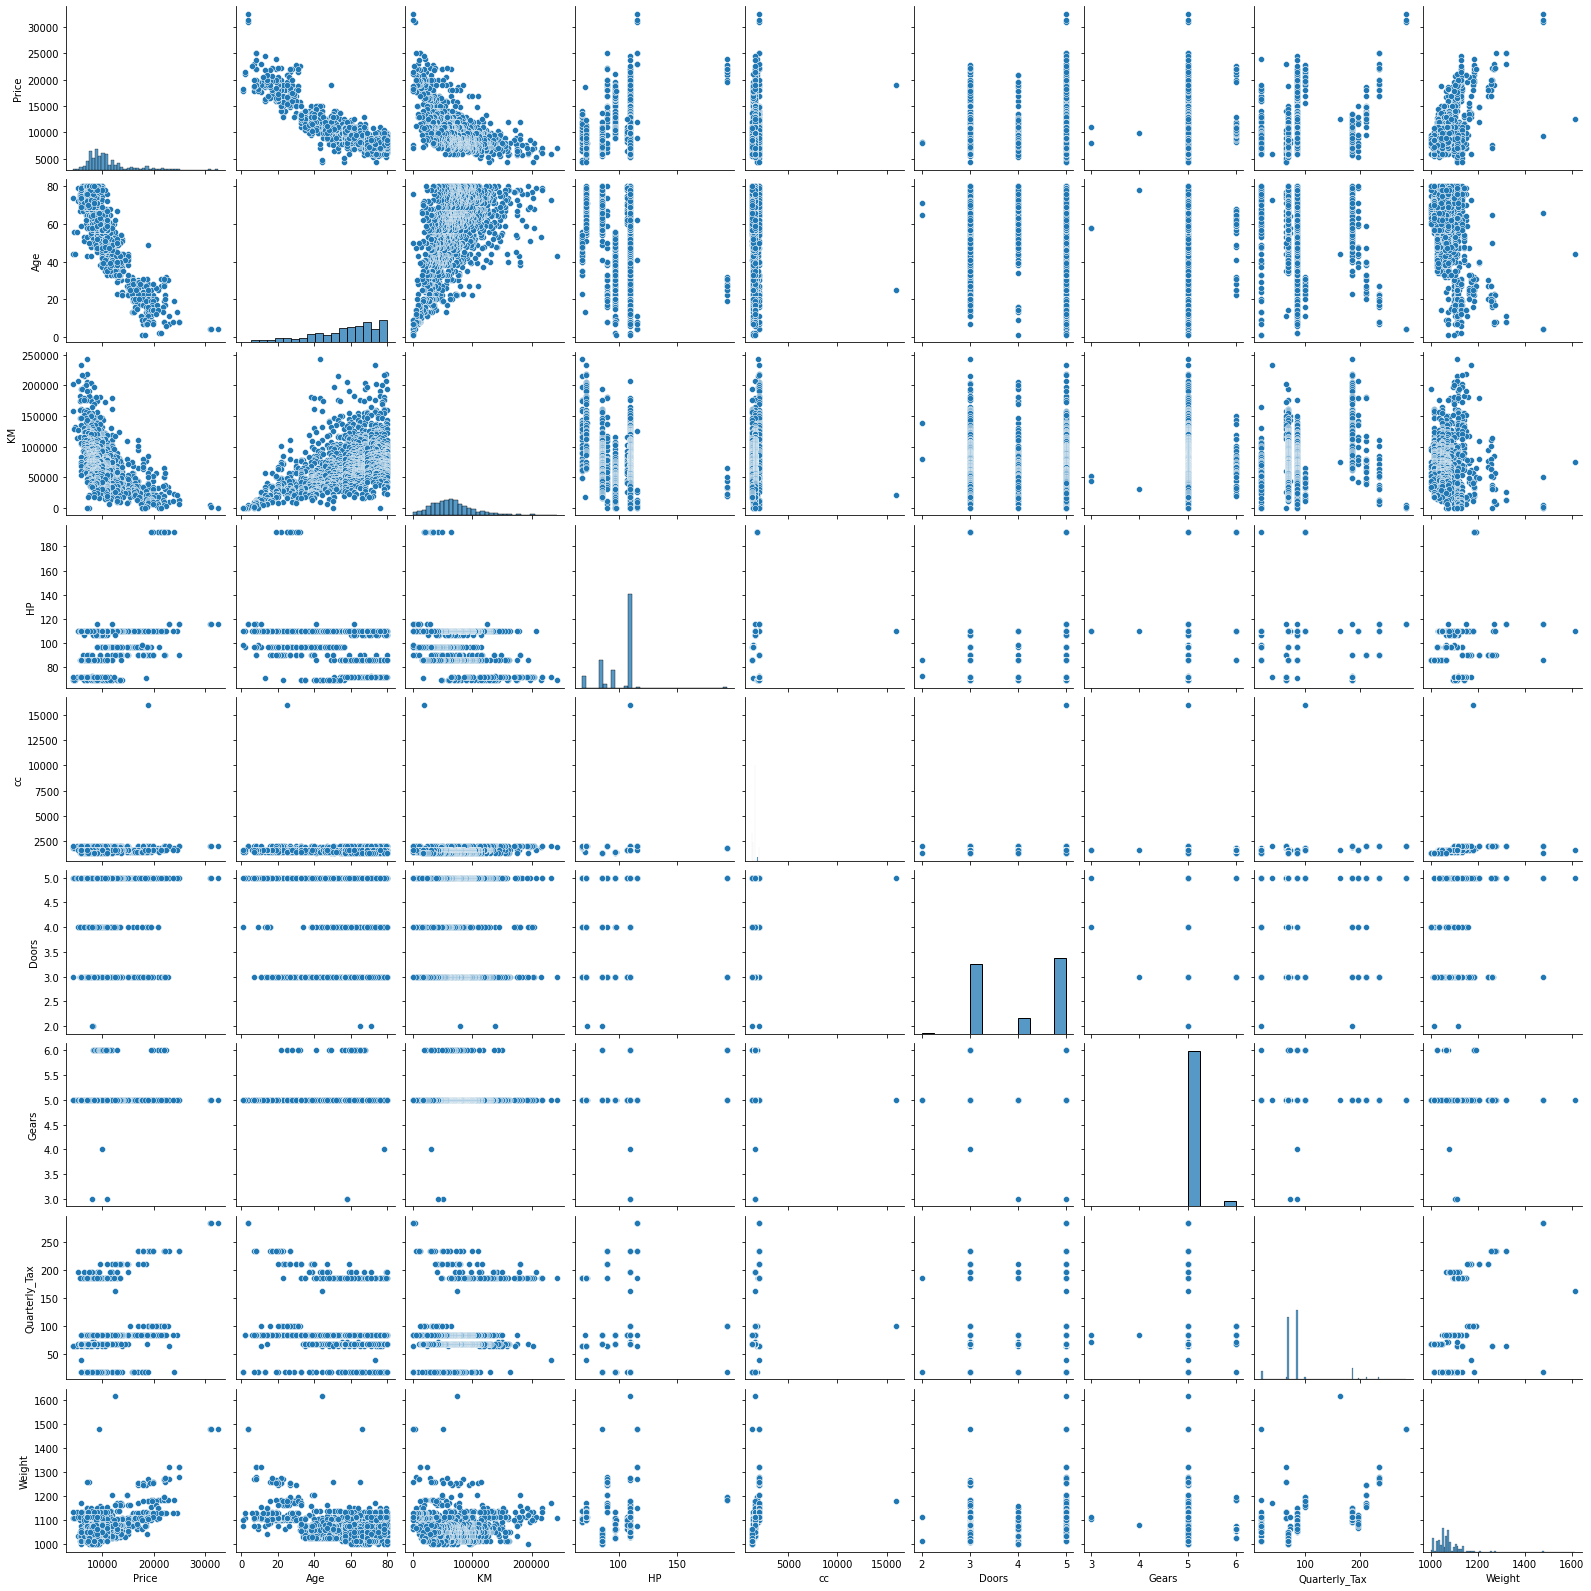

In [68]:
# Data spread -> Pairplot

sns.pairplot(data)

In [69]:
# Checking the Zero Variance

data.var() == 0

Price            False
Age              False
KM               False
HP               False
cc               False
Doors            False
Gears            False
Quarterly_Tax    False
Weight           False
dtype: bool

In [72]:
# Checking the Duplicates

duplicates = data.duplicated()
sum(duplicates)

1

In [75]:
data = data.drop_duplicates(keep = False)

In [76]:
data.duplicated().sum()

0

In [78]:
# Transformatiom

import scipy.stats as stats
import pylab

((array([-3.30010144, -3.0425298 , -2.89926962, ...,  2.89926962,
          3.0425298 ,  3.30010144]),
  array([ 4350,  4400,  4450, ..., 31000, 31275, 32500])),
 (3323.554466294259, 10710.993026499302, 0.9241378153628175))

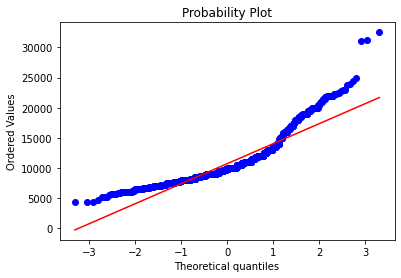

In [79]:
stats.probplot(data['Price'], dist = 'norm', plot = pylab)

((array([-3.30010144, -3.0425298 , -2.89926962, ...,  2.89926962,
          3.0425298 ,  3.30010144]),
  array([ 8.37793112,  8.38935982,  8.40065938, ..., 10.34174248,
         10.35057434, 10.38899537])),
 (0.2891719228879013, 9.232457505524877, 0.9800768719099098))

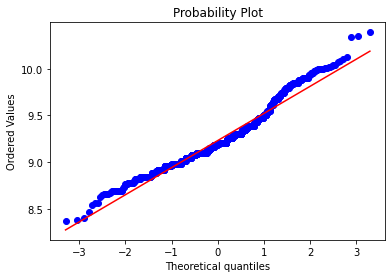

In [80]:
stats.probplot(np.log(data['Price']), dist = 'norm', plot = pylab)

((array([-3.30010144, -3.0425298 , -2.89926962, ...,  2.89926962,
          3.0425298 ,  3.30010144]), array([ 1,  1,  2, ..., 80, 80, 80])),
 (17.876090391220675, 56.0139470013947, 0.9632781901999687))

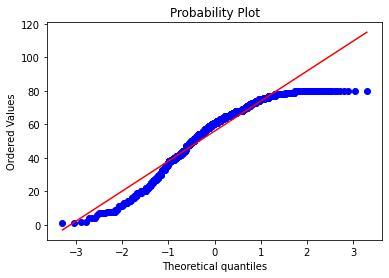

In [81]:
stats.probplot(data['Age'], dist = 'norm', plot = pylab)

((array([-3.30010144, -3.0425298 , -2.89926962, ...,  2.89926962,
          3.0425298 ,  3.30010144]),
  array([     1,      1,      1, ..., 218118, 232940, 243000])),
 (36540.16086725871, 68610.35913528591, 0.9734024580254916))

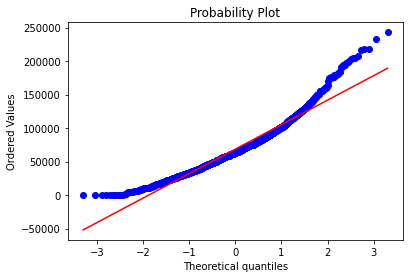

In [83]:
stats.probplot(data['KM'], dist = 'norm', plot = pylab)

((array([-3.30010144, -3.0425298 , -2.89926962, ...,  2.89926962,
          3.0425298 ,  3.30010144]),
  array([ 69,  69,  69, ..., 192, 192, 192])),
 (12.593651744883747, 101.48186889818689, 0.8391916435321292))

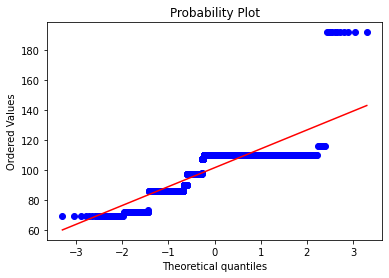

In [84]:
stats.probplot(data['HP'], dist = 'norm', plot = pylab)

((array([-3.30010144, -3.0425298 , -2.89926962, ...,  2.89926962,
          3.0425298 ,  3.30010144]),
  array([ 1300,  1300,  1300, ...,  2000,  2000, 16000])),
 (199.4331737785425, 1576.265690376569, 0.4691434251312408))

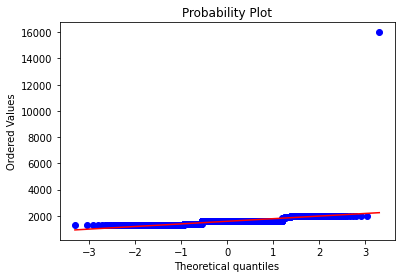

In [85]:
stats.probplot(data['cc'], dist = 'norm', plot = pylab)

((array([-3.30010144, -3.0425298 , -2.89926962, ...,  2.89926962,
          3.0425298 ,  3.30010144]), array([2, 2, 3, ..., 5, 5, 5])),
 (0.7981708694012876, 4.032078103207811, 0.8364329580093602))

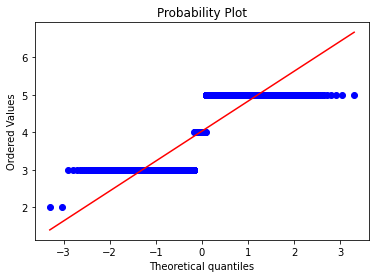

In [86]:
stats.probplot(data['Doors'], dist = 'norm', plot = pylab)

((array([-3.30010144, -3.0425298 , -2.89926962, ...,  2.89926962,
          3.0425298 ,  3.30010144]), array([3, 3, 4, ..., 6, 6, 6])),
 (0.07891935893104413, 5.02649930264993, 0.41765979559849487))

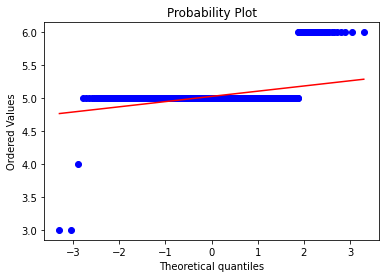

In [87]:
stats.probplot(data['Gears'], dist = 'norm', plot = pylab)

((array([-3.30010144, -3.0425298 , -2.89926962, ...,  2.89926962,
          3.0425298 ,  3.30010144]),
  array([ 19,  19,  19, ..., 283, 283, 283])),
 (32.90259371041023, 86.91771269177127, 0.8052941769023308))

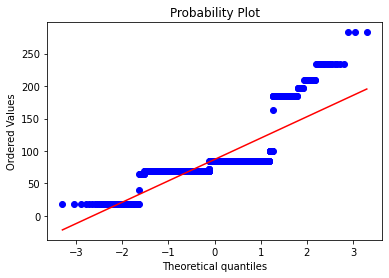

In [88]:
stats.probplot(data['Quarterly_Tax'], dist = 'norm', plot = pylab)

((array([-3.30010144, -3.0425298 , -2.89926962, ...,  2.89926962,
          3.0425298 ,  3.30010144]),
  array([1000, 1000, 1000, ..., 1480, 1480, 1615])),
 (45.942541029188085, 1072.1143654114364, 0.884434472225984))

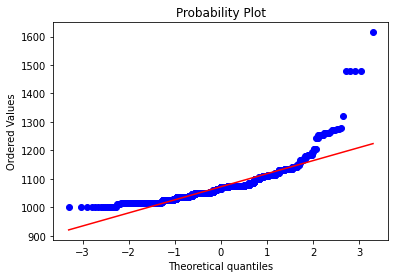

In [89]:
stats.probplot(data['Weight'], dist = 'norm', plot = pylab)

In [90]:
# Standardization using Scaler Min = 0, Max = 1

def norm_fun(i):
  x = (i - i.min())/(i.max() - i.min())

  return x

In [91]:
data_norm = norm_fun(data)
data = pd.DataFrame(data_norm)
data.describe() 

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,0.225968,0.696379,0.282344,0.264080,0.018794,0.677359,0.675500,0.257264,0.117259
std,0.127544,0.234512,0.154222,0.121803,0.028870,0.317552,0.062880,0.154505,0.084323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145648,0.544304,0.176951,0.170732,0.006803,0.333333,0.666667,0.189394,0.065041
50%,0.197158,0.759494,0.261129,0.333333,0.020408,0.666667,0.666667,0.250000,0.113821
75%,0.269982,0.873418,0.358278,0.333333,0.020408,1.000000,0.666667,0.250000,0.138211
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
# Implementating the Multi Linear Regression

import statsmodels.formula.api as smf

In [93]:
model = smf.ols('Price ~ Age + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1106.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        10:50:52   Log-Likelihood:                 2334.9
No. Observations:                1434   AIC:                            -4652.
Df Residuals:                    1425   BIC:                            -4604.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3838      0.015     24.852      0.000       0.354       0.414
Age              -0.3417      0.007    -46.594      0.000      -0.356      -0.327
KM               -0.1783      0.011    -16.481      0.000      -0.200      -0.157
HP                0.1376      0.012     11.177      0.000       0.113       0.162
cc               -0.0605      0.047     -1.288      0.198      -0.153       0.032
Doors         -2.078e-05      0.004     -0.005      0.996      -0.008       0.008
Gears             0.0641      0.021      3.054      0.002       0.023       0.105
Quarterly_Tax     0.0353      0.012      2.871      0.004       0.011       0.059
Weight            0.3659      0.023     15.637      0.000       0.320       0.412
==============================================================================
Omnibus:                      147.699   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              990.036
Skew:                          -0.189   Prob(JB):                    1.04e-215
Kurtosis:                       7.053   Cond. No.                         61.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Variance Inflation Factor (VIF)
# Check for Colinearity to decide to remove a variable using VIF
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables
rsq_Age = smf.ols('Age ~  KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight', data = data).fit().rsquared  
vif_Age = 1/(1 - rsq_Age) 

rsq_KM = smf.ols('KM ~ Age +  HP + cc + Doors + Gears + Quarterly_Tax + Weight', data = data).fit().rsquared  
vif_KM = 1/(1 - rsq_KM)

rsq_HP = smf.ols('HP ~ KM + Age + cc + Doors + Gears + Quarterly_Tax + Weight', data = data).fit().rsquared  
vif_HP = 1/(1 - rsq_HP) 

rsq_cc = smf.ols('cc ~ KM + Age + HP + Doors + Gears + Quarterly_Tax + Weight ', data = data).fit().rsquared  
vif_cc = 1/(1 - rsq_cc) 

rsq_Doors = smf.ols('Doors ~  KM + Age + cc + HP + Gears + Quarterly_Tax + Weight', data = data).fit().rsquared  
vif_Doors = 1/(1 - rsq_Doors) 

rsq_Gears = smf.ols('Gears ~ KM + Age +  HP + cc + Doors + Quarterly_Tax + Weight', data = data).fit().rsquared  
vif_Gears = 1/(1 - rsq_Gears)

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax ~ KM + Age + HP + cc + Doors + Gears + Weight', data = data).fit().rsquared  
vif_Quarterly_Tax = 1/(1 - rsq_Quarterly_Tax) 

rsq_Weight = smf.ols('Weight ~ KM + Age + HP + cc + Doors + Gears + Quarterly_Tax ', data = data).fit().rsquared  
vif_Weight = 1/(1 - rsq_Weight) 

In [95]:
# Storing vif values in a data frame
d1 = {'Variables':['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight'], 'VIF':[vif_Age, vif_KM, vif_HP, vif_cc, vif_Doors, vif_Gears, vif_Quarterly_Tax, vif_Weight]}
Vif_frame = pd.DataFrame(data)  
Vif_frame

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.325044,0.278481,0.193355,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
1,0.333925,0.278481,0.300149,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
2,0.341030,0.291139,0.171647,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
3,0.376554,0.316456,0.197528,0.170732,0.047619,0.333333,0.666667,0.723485,0.268293
4,0.333925,0.367089,0.158433,0.170732,0.047619,0.333333,0.666667,0.723485,0.276423
...,...,...,...,...,...,...,...,...,...
1431,0.111901,0.860759,0.084539,0.138211,0.000000,0.333333,0.666667,0.189394,0.040650
1432,0.230728,0.898734,0.078186,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1433,0.147425,0.886076,0.070021,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390
1434,0.103020,0.873418,0.069609,0.138211,0.000000,0.333333,0.666667,0.189394,0.024390


In [96]:
final_model = smf.ols('Price ~ Age + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight', data = data).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1106.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:12:44   Log-Likelihood:                 2334.9
No. Observations:                1434   AIC:                            -4652.
Df Residuals:                    1425   BIC:                            -4604.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3838      0.015     24.852      0.000       0.354       0.414
Age              -0.3417      0.007    -46.594      0.000      -0.356      -0.327
KM               -0.1783      0.011    -16.481      0.000      -0.200      -0.157
HP                0.1376      0.012     11.177      0.000       0.113       0.162
cc               -0.0605      0.047     -1.288      0.198      -0.153       0.032
Doors         -2.078e-05      0.004     -0.005      0.996      -0.008       0.008
Gears             0.0641      0.021      3.054      0.002       0.023       0.105
Quarterly_Tax     0.0353      0.012      2.871      0.004       0.011       0.059
Weight            0.3659      0.023     15.637      0.000       0.320       0.412
==============================================================================
Omnibus:                      147.699   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              990.036
Skew:                          -0.189   Prob(JB):                    1.04e-215
Kurtosis:                       7.053   Cond. No.                         61.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# Predictions

pred = final_model.predict(data)

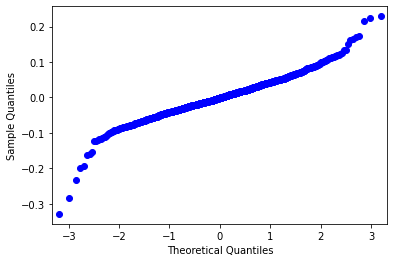

In [100]:
# Q Q Plot
res = final_model.resid
sm.qqplot(res)
plt.show()

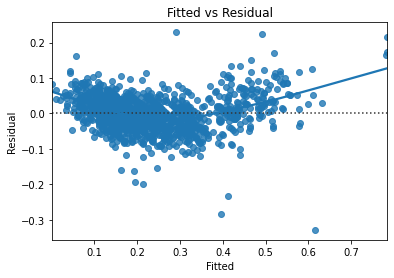

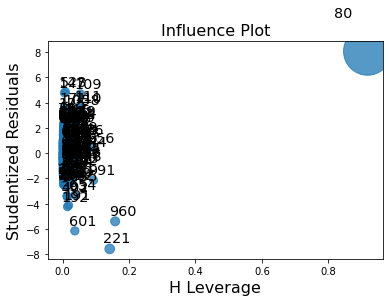

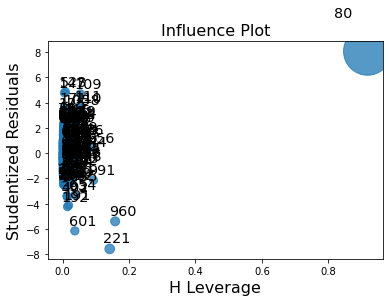

In [103]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = data.Price, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

sm.graphics.influence_plot(final_model)

In [104]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.2) # 20% test data

# preparing the model on train data 
model_train = smf.ols('Price ~ Age + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight', data = data_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     897.0
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        11:16:24   Log-Likelihood:                 1862.6
No. Observations:                1147   AIC:                            -3707.
Df Residuals:                    1138   BIC:                            -3662.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3846      0.017     22.661      0.000       0.351       0.418
Age              -0.3373      0.008    -40.955      0.000      -0.353      -0.321
KM               -0.1793      0.012    -14.921      0.000      -0.203      -0.156
HP                0.1293      0.014      9.525      0.000       0.103       0.156
cc               -0.0349      0.048     -0.732      0.465      -0.129       0.059
Doors            -0.0028      0.005     -0.572      0.567      -0.012       0.007
Gears             0.0637      0.023      2.774      0.006       0.019       0.109
Quarterly_Tax     0.0164      0.014      1.188      0.235      -0.011       0.044
Weight            0.4039      0.028     14.676      0.000       0.350       0.458
==============================================================================
Omnibus:                      149.932   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1255.900
Skew:                          -0.278   Prob(JB):                    1.93e-273
Kurtosis:                       8.096   Cond. No.                         55.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# prediction on test data set 
test_pred = model_train.predict(data_test)

# test residual values 
test_resid = test_pred - data_test.Price
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

0.04697055422145746

In [106]:
# train_data prediction
train_pred = model_train.predict(data_train)

# train residual values
train_resid  = train_pred - data_train.Price
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

0.04770182520001835